In [105]:
import ipywidgets as widgets
from ipywidgets import interact, VBox, Dropdown, Output
from IPython.display import display, clear_output, HTML, IFrame, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import Normalize
from matplotlib.cm import viridis
import seaborn as sns
import json
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from res_immunology_automation.src.scripts.target_analyzer import TargetAnalyzer
from helper import (
    display_target_information,
    setup_disease_selection_interface,
    parse_and_plot_targetability,
    plot_tractability,
    parse_gene_ontology,
    display_go_ribbon,
    parse_mouse_phenotypes,
    #parse_and_display_homologue_table,
    display_paralogs,
    prepare_data,
    setup_interactive_plot,
    display_feature_viewer,
    display_target_info,
    display_organism_taxonomy_details,
    display_topology_table,
    process_and_display_knowndrugs,
    display_safety_events
)
import warnings
warnings.filterwarnings('ignore')

### Target

In [81]:
target = input("Please specify the target: ")

Please specify the target: CMKLR1


## Target Introduction

##### A brief introduction of the target.

In [58]:
analyzer = TargetAnalyzer(target)
api_response = analyzer.get_target_introduction()
display_target_info(api_response)

Getting ensembl id for ADORA3...
ENSG00000282608
Getting HGNC id for ADORA3...
HGNC:268
Getting ensembl id for ADORA3...
ENSG00000282608
Using Ensembl ID: ENSG00000282608


Field,Value
Accession,P0DMS8
Protein,Adenosine receptor A3
Gene,ADORA3
Status,UniProtKB reviewed (Swiss-Prot)
Organism,Homo sapiens
Protein Existence,1: Evidence at protein level
Annotation Score,5.0


## Target Description

##### This section provides a comprehensive introduction to the target, offering a detailed overview of its identity, background, significance, and a list of its synonyms.

In [109]:
analyzer = TargetAnalyzer(target)
response = analyzer.get_target_description()
display_target_information(response)

Getting ensembl id for ADORA3...
ENSG00000282608
Getting HGNC id for ADORA3...
HGNC:268
Getting ensembl id for ADORA3...
ENSG00000282608
Using Ensembl ID: ENSG00000282608


HTML(value='<b>Target ID:</b> ENSG00000282608<br>', layout=Layout(margin='10px 0px'))

HTML(value='<b>Function Descriptions:</b>', layout=Layout(margin='10px 0px'))

HTML(value="<span style='font-size: 14px;'>- [Isoform 2]: Receptor for adenosine. The activity of this recepto…

HTML(value='<b>Synonyms (from UniProt):</b>', layout=Layout(margin='10px 0px'))

HTML(value="<span style='font-size: 14px;'>- Adenosine receptor A3</span><br>", layout=Layout(margin='5px 0px'…

HTML(value="<span style='font-size: 14px;'>- ADORA3</span><br>", layout=Layout(margin='5px 0px'))

## Taxonomy

##### This section provides information about the protein and gene name(s) and synonym(s) and about the organism that is the source of the protein sequence.  It provides information on how conserved a gene is. 


In [60]:
api_response = analyzer.get_target_introduction()
display_organism_taxonomy_details(api_response)

Field,Value
Taxonomic identifier,9606 NCBI
Organism,Homo sapiens (Human)
Taxonomic lineage,Eukaryota > Metazoa > Chordata > Craniata > Vertebrata > Euteleostomi > Mammalia > Eutheria > Euarchontoglires > Primates > Haplorrhini > Catarrhini > Hominidae > Homo


## Disease Association

##### A comprehensive view of the target’s relevance across related diseases and phenotypes.

In [112]:
setup_disease_selection_interface(target)

## Targetability

##### The section is designed to visually inform on target prioritisation. Using a colour scale, BLUE indicates potentially NEGATIVE attributes and YELLOW indicates potentially POSITIVE attributes, providing information to help users assess the targets for further prioritisation or deprioritisation, respectively.

Most associated disease: kidney failure with EFO ID: EFO_1002048
Found EFO ID for kidney failure: EFO:1002048


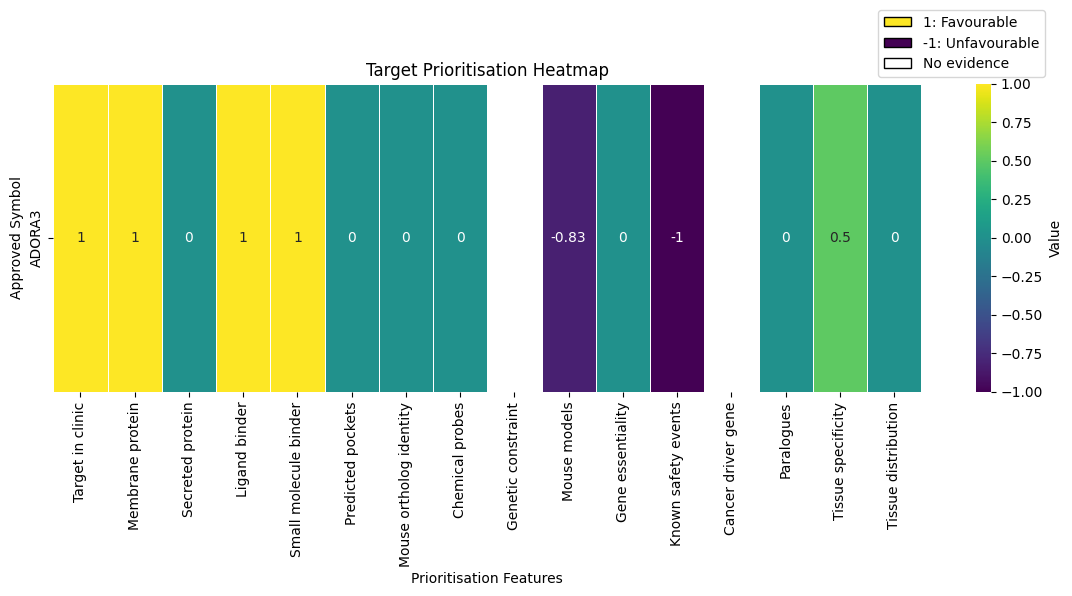

In [62]:
response = analyzer.get_targetablitiy()
parse_and_plot_targetability(response,target)

## Tractability

##### Assist in target prioritisation by identifying potential drug targets suitable for discovery pipelines and therapeutic modalities with small molecule, antibody, and other clinical modalities.

Using Ensembl ID: ENSG00000282608


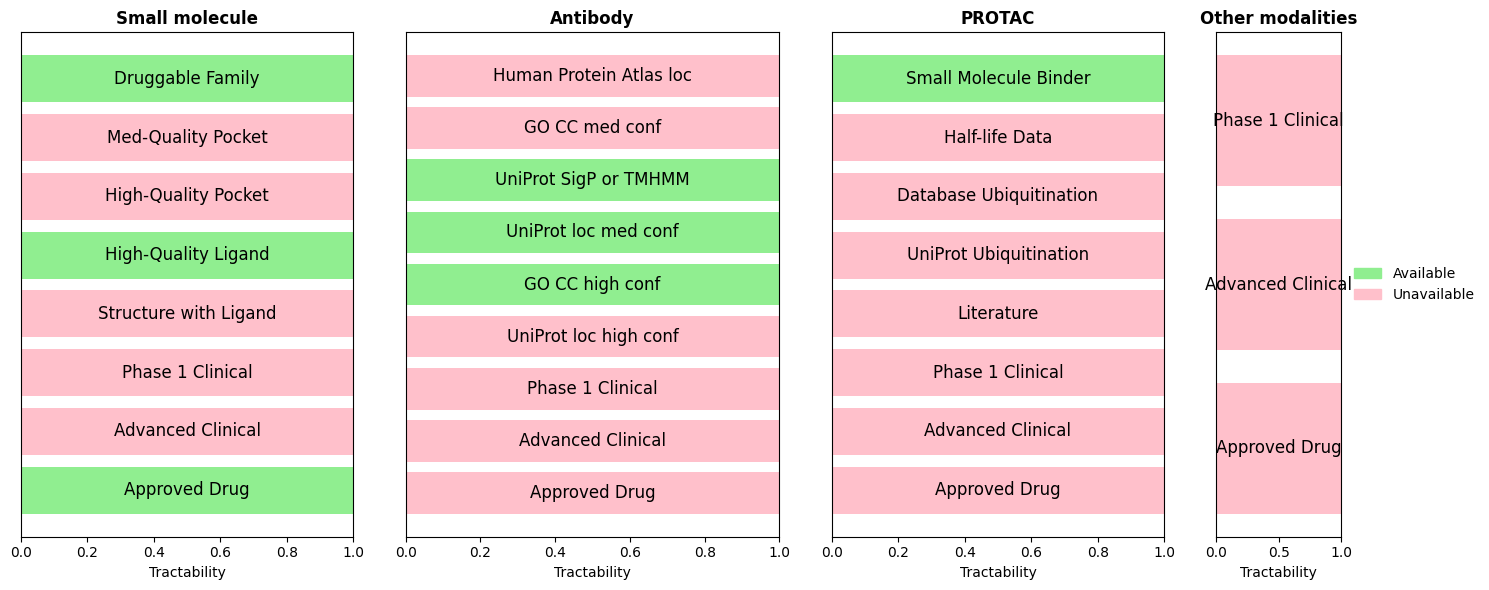

In [63]:
response = analyzer.get_tractability()
plot_tractability(response)

## Target Ontology

##### Ontologies usually consist of a set of classes (or terms or concepts) with relations that operate between them. The Gene Ontology (GO) describes our knowledge of the biological domain with respect to three aspects: cellular component, biological process, and molecular function. Cell color indicates annotation volume: dark blue for higher volume and light blue for lower volume.

In [64]:
response = analyzer.get_target_ontology()
ontology_df = parse_gene_ontology(response)
display(HTML(ontology_df.to_html(escape=False)))

,GO ID,Name,Aspect,Evidence,Gene Product,Source
1,GO:0030336,negative regulation of cell migration,Biological Process,IMP,P0DMS8,PMID:27886186
2,GO:0008285,negative regulation of cell population proliferation,Biological Process,IMP,P0DMS8,PMID:27886186
3,GO:0007165,signal transduction,Biological Process,TAS,P0DMS8,PMID:8399349
4,GO:0006954,inflammatory response,Biological Process,TAS,P0DMS8,PMID:9164961
5,GO:0001973,G protein-coupled adenosine receptor signaling pathway,Biological Process,IBA,P0DMS8,GO_REF:0000033
6,GO:0007190,activation of adenylate cyclase activity,Biological Process,TAS,P0DMS8,PMID:9380026
7,GO:0099171,presynaptic modulation of chemical synaptic transmission,Biological Process,IEA,P0DMS8,GO_REF:0000107
8,GO:0014061,regulation of norepinephrine secretion,Biological Process,IEA,P0DMS8,GO_REF:0000107
9,GO:0009611,response to wounding,Biological Process,TAS,P0DMS8,PMID:9837869
10,GO:0032088,negative regulation of NF-kappaB transcription factor activity,Biological Process,IMP,P0DMS8,PMID:27886186


In [65]:
display_go_ribbon(analyzer.hgnc_id)

## Mouse Phenotypes

##### Mouse models help prioritize and validate potential drug targets. If a gene is associated with relevant phenotypes in mice, it strengthens its candidacy for further investigation. 

In [66]:
response = analyzer.get_mouse_phenotypes()
parse_mouse_phenotypes(response)

Using Ensembl ID: ENSG00000282608


Gene,Phenotype,Category,Allelic Composition
Adora3,increased coronary flow rate,cardiovascular system phenotype,Adora3/Adora3
Adora3,decreased tumor necrosis factor secretion,immune system phenotype,Adora3/Adora3
Adora3,abnormal mast cell degranulation,"hematopoietic system phenotype, immune system phenotype, cellular phenotype",Adora3/Adora3
Adora3,impaired neutrophil recruitment,"hematopoietic system phenotype, immune system phenotype",Adora3/Adora3
Adora3,decreased myocardial infarct size,"homeostasis/metabolism phenotype, cardiovascular system phenotype",Adora3/Adora3
Adora3,decreased systemic arterial blood pressure,cardiovascular system phenotype,Adora3/Adora3
Adora3,decreased acute inflammation,immune system phenotype,Adora3/Adora3
Adora3,decreased susceptibility to kidney reperfusion injury,"homeostasis/metabolism phenotype, renal/urinary system phenotype",Adora3/Adora3
Adora3,abnormal response/metabolism to endogenous compounds,homeostasis/metabolism phenotype,"Adora3/Adora3, Adora3/Adora3"
Adora3,decreased mast cell degranulation,"hematopoietic system phenotype, immune system phenotype, cellular phenotype",Adora3/Adora3


## Paralogs

##### Description:  Homology for a target across selected species.

In [67]:
response = analyzer.get_paralogs()
display_paralogs(response)

,Species,species_id,Gene1 Symbol,Paralog Score,DIOPT Score,Paralog Pair,Gene2 Symbol,1-Protein Acc,2-Protein Acc,Alignment Length,Identity Score,Similarity Score,Common GO slim,Common Yeast Paralogs,Common Fly Paralogs,Common Protein Interactors,Common Genetic Interactors,Coexpressed Samples,Tissue Expression Correlation,Cell Line Expression Correlation
1,human,9606,ADORA3,3.40,4,text show expression data,ADORA1,NP_000668,NP_000665,322,0.49,0.69,GO:0004871(signal transducer activity);GO:0005623(cell);GO:0007165(signal transduction),,"mAChR-C(DIOPT=1,1);AdoR(DIOPT=5,7);",0,0,2,0.16309,-0.12740
2,human,9606,ADORA3,3.12,4,text show expression data,ADORA2B,NP_000668,NP_000667,315,0.39,0.58,GO:0004871(signal transducer activity);GO:0005623(cell);GO:0007165(signal transduction),,"AdoR(DIOPT=5,8);mAChR-C(DIOPT=1,1);",0,0,0,-0.25230,-0.14580
3,human,9606,ADORA3,3.04,4,text show expression data,ADORA2A,NP_000668,NP_000666,336,0.39,0.59,GO:0004871(signal transducer activity);GO:0005623(cell);GO:0007165(signal transduction),,"mAChR-C(DIOPT=1,1);AdoR(DIOPT=5,6);",0,0,1,-0.12997,0.05964
4,human,9606,ADORA3,2.55,1,text show expression data,GPBAR1,NP_000668,NP_001070659,355,0.20,0.37,GO:0004871(signal transducer activity);GO:0005623(cell);GO:0007165(signal transduction),,"AdoR(DIOPT=5,1);",0,0,0,0.10893,0.01933
5,human,9606,ADORA3,1.30,1,text show expression data,CD300H,NP_000668,NP_001311002,77,0.29,0.45,,,,0,0,0,0.00000,0.00000
6,human,9606,ADORA3,1.23,1,text show expression data,CD300LF,NP_000668,XP_016879701,100,0.25,0.39,GO:0005623(cell);GO:0007165(signal transduction),,,0,0,0,0.08985,0.50067
7,human,9606,ADORA3,1.21,1,text show expression data,CD300LD,NP_000668,NP_001108624,24,0.42,0.62,GO:0005623(cell),,,0,0,0,-0.01759,0.04177
8,human,9606,ADORA3,1.12,1,text show expression data,CD300LG,NP_000668,XP_006721784,47,0.30,0.57,GO:0005623(cell),,,0,0,1,0.03582,0.10099
9,human,9606,ADORA3,1.09,1,text show expression data,TREML1,NP_000668,XP_016866311,57,0.32,0.46,GO:0005623(cell),,,0,0,0,0.09517,0.13923
10,human,9606,ADORA3,1.06,1,text show expression data,PIGR,NP_000668,NP_002635,90,0.27,0.41,GO:0004871(signal transducer activity);GO:0005623(cell);GO:0007165(signal transduction),,,0,0,1,0.03952,0.00328


## Differential RNA/Protein Expressions

##### This section provides the RNA and protein baseline expression for given target. Identify genes, proteins, metabolites, or imaging features that are significantly altered in the disease state. A target is considered to be tissue specific if the z-score is greater than 0.674 (or the 75th percentile of a perfect normal distribution).

In [78]:
response = analyzer.get_differential_rna_and_protein_expression()
df = prepare_data(response['data']['target']['expressions'])
setup_interactive_plot(df)

Using Ensembl ID: ENSG00000282608


Dropdown(description='Organ:', options=('All', 'bladder organ', 'blood', 'brain', 'breast', 'colon', 'connecti…

Output()

## Protein structure, sequence, domain organization and mutation(s)

##### Protein structural information serves as the cornerstone for comprehending a target protein’s behavior, interactions, and therapeutic potential in drug development.

In [74]:
display_feature_viewer(analyzer.uniprot_id)

## Subcellular section

##### This section describes the location and the topology of the mature protein in the cell. It also highlights each non-membrane and membrane-spanning region of a protein.<br>It provides insights into tailored drug design for treating diseases. <br> The Description section redirects to the sequence analysis.

In [75]:
api_response = analyzer.get_target_topology_features()
display_topology_table(api_response)

Dropdown(description='TYPE:', options=('All', 'Topological domain', 'Transmembrane'), style=DescriptionStyle(d…

Output()

## Known Drugs

#### Clinical precedence for drugs with investigational or approved indications targeting the gene according to their curated mechanism of action.

In [76]:
response = analyzer.get_known_drugs()
process_and_display_knowndrugs(response)

Using Ensembl ID: ENSG00000282608


Output()

## Safety

#### Reported safety effects and risk information

In [77]:
response = analyzer.get_safety()
display_safety_events(response)

Using Ensembl ID: ENSG00000282608


Safety event,Biosystems,Dosing effect,Experimental Studies,Source
hypotension,"cardiovascular system, immune",Direction: Activation/Increase/UpregulationDosing: general,N/A,Urban et al. (2012)
proischemic (cerebral),"cardiovascular system, immune",Direction: Activation/Increase/UpregulationDosing: general,N/A,Urban et al. (2012)
decreased locomotor activity,"nervous system, respiratory",Direction: Activation/Increase/UpregulationDosing: acute,N/A,Lynch et al. (2017)
cell proliferation,"cardiovascular system, immune",Direction: Activation/Increase/UpregulationDosing: general,N/A,Urban et al. (2012)
antiischaemic (cardioprotective),"cardiovascular system, immune",Direction: Activation/Increase/UpregulationDosing: general,N/A,Urban et al. (2012)
hypertension (inferred by author),"cardiovascular system, immune",Direction: Inhibition/Decrease/DownregulationDosing: general,N/A,Urban et al. (2012)
interference with the regulation of cell growth (inferred by author),"cardiovascular system, immune",Direction: Inhibition/Decrease/DownregulationDosing: general,N/A,Urban et al. (2012)
cell necrosis,"cardiovascular system, immune",Direction: Activation/Increase/UpregulationDosing: general,N/A,Urban et al. (2012)
decreased pain,"nervous system, respiratory",Direction: Activation/Increase/UpregulationDosing: acute,N/A,Lynch et al. (2017)
decreased convulsions,"nervous system, respiratory",Direction: Activation/Increase/UpregulationDosing: acute,N/A,Lynch et al. (2017)
